In [34]:
import csv
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

### 데이터 판다스로 입력, 컬럼 정리

In [35]:
import pandas as pd
ch1 = pd.read_csv('./channel_1.dat', names=['Unix', 'Watt'],header=None, delimiter=" ")
print('Import Done.')

Import Done.


In [36]:
ch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Unix    int64
 1   Watt    int64
dtypes: int64(2)
memory usage: 333.2 MB


In [37]:
from datetime import datetime
ch1_date = pd.DataFrame(ch1,columns = ['Unix', 'Date', 'Watt'])

ch1_date['Date'] = pd.to_datetime(ch1['Unix'], unit='s')
ch1_date.info()
ch1_date.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Unix    int64         
 1   Date    datetime64[ns]
 2   Watt    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 499.8 MB


,Unix,Date,Watt
0,1352500095,2012-11-09 22:28:15,599
1,1352500101,2012-11-09 22:28:21,582
2,1352500107,2012-11-09 22:28:27,600
3,1352500113,2012-11-09 22:28:33,586
4,1352500120,2012-11-09 22:28:40,596
5,1352500132,2012-11-09 22:28:52,581
6,1352500138,2012-11-09 22:28:58,597
7,1352500144,2012-11-09 22:29:04,592
8,1352500150,2012-11-09 22:29:10,587
9,1352500156,2012-11-09 22:29:16,574


### 변수 및 구분 단계

In [38]:
Day_data=ch1_date[431369:444742]

In [39]:
Day_data=Day_data.reset_index()
Day_data.to_excel("./13_Jan_1_Origin.xlsx")

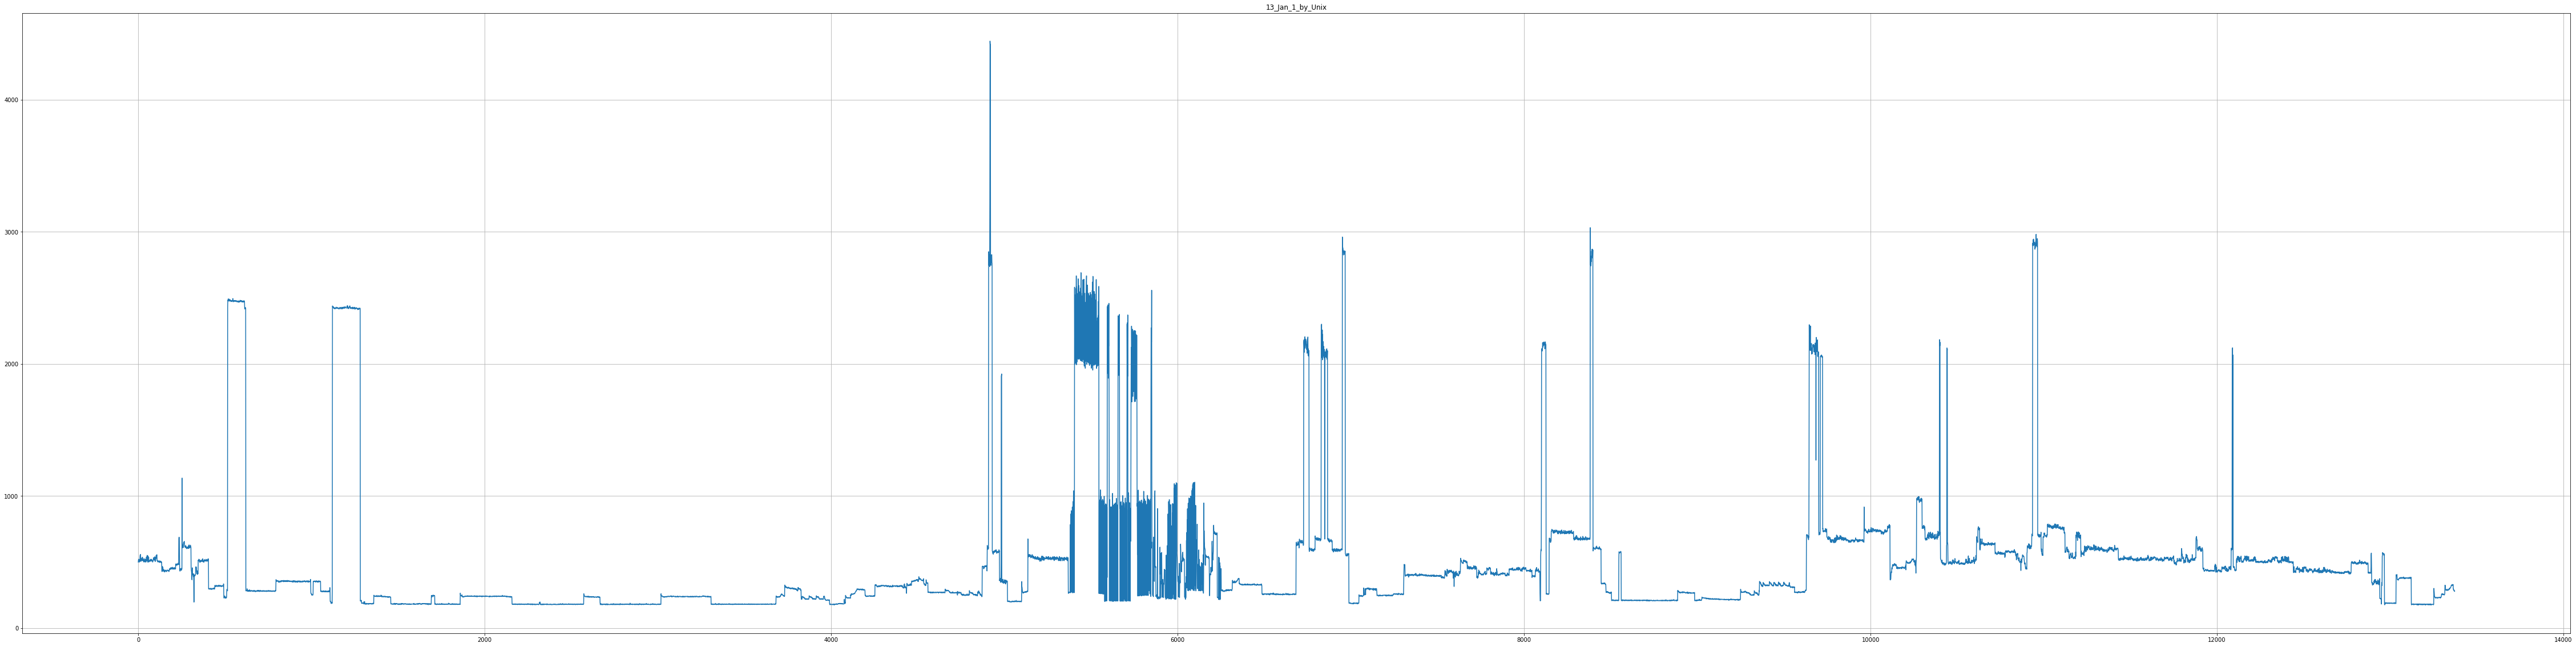

In [40]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_Unix")
plt.plot(range(len(Day_data)), Day_data["Watt"])
plt.savefig('./13_Jan_1_by_Unix.png')
plt.show()

In [41]:
total_watt_list=[]
H_list=list(range(24))
M_list=list(range(60))

i=0
i2=0
i3=0

while(i<len(Day_data)):
    list1 = Day_data.loc[i].values.tolist()
    date = str(list1[2])
    M=int(date[-5:-3])
    H=int(date[-8:-6])
    watt_list=[]
    
    while(H<24):
        print("여기래요", i, i2, i3, H, M)
        list1 = Day_data.loc[i].values.tolist()
        date = str(list1[2])
        M=int(date[-5:-3])
        H=int(date[-8:-6])
        watt_list=[]
        
        while(M<60):
            try:
                list1 = Day_data.loc[i].values.tolist()
                date = str(list1[2])
                M=int(date[-5:-3])

                if i3==60:
                    i2+=1
                    i3=0
                    break

                else:
                    try:
                        if(M==M_list[i3] and H==H_list[i2]):
                            print("수집", i, i2, i3, date, list1[3])
                            watt_list.append(list1[3])
                            i+=1

                        if(M!=M_list[i3]and H==H_list[i2]):
                            print("확인", i, i2, i3, date, watt_list, "이전 분대 값들임")
                            total_watt_list.append(max(watt_list))
                            watt_list=[]
                            i3+=1
                    except:
                        print("예외처리됨!!")
                        print(M, H, i, i2, i3)
                        total_watt_list.append(0)
                        i3+=1
            except:
                total_watt_list.append(max(watt_list))
                break


print(total_watt_list)

여기래요 0 0 0 0 0
수집 0 0 0 2013-01-01 00:00:07 500
수집 1 0 0 2013-01-01 00:00:13 515
수집 2 0 0 2013-01-01 00:00:19 522
수집 3 0 0 2013-01-01 00:00:26 508
수집 4 0 0 2013-01-01 00:00:32 502
수집 5 0 0 2013-01-01 00:00:38 507
수집 6 0 0 2013-01-01 00:00:44 508
수집 7 0 0 2013-01-01 00:00:50 500
수집 8 0 0 2013-01-01 00:00:56 517
확인 9 0 0 2013-01-01 00:01:02 [500, 515, 522, 508, 502, 507, 508, 500, 517] 이전 분대 값들임
수집 9 0 1 2013-01-01 00:01:02 505
수집 10 0 1 2013-01-01 00:01:08 538
수집 11 0 1 2013-01-01 00:01:15 551
수집 12 0 1 2013-01-01 00:01:21 530
수집 13 0 1 2013-01-01 00:01:27 558
수집 14 0 1 2013-01-01 00:01:33 522
수집 15 0 1 2013-01-01 00:01:39 514
수집 16 0 1 2013-01-01 00:01:45 505
수집 17 0 1 2013-01-01 00:01:52 511
수집 18 0 1 2013-01-01 00:01:58 517
확인 19 0 1 2013-01-01 00:02:04 [505, 538, 551, 530, 558, 522, 514, 505, 511, 517] 이전 분대 값들임
수집 19 0 2 2013-01-01 00:02:04 519
수집 20 0 2 2013-01-01 00:02:10 529
수집 21 0 2 2013-01-01 00:02:16 512
수집 22 0 2 2013-01-01 00:02:22 530
수집 23 0 2 2013-01-01 00:02:28 513
수집 

수집 413 0 44 2013-01-01 00:44:53 295
확인 414 0 44 2013-01-01 00:45:05 [511, 296, 297, 297, 301, 296, 298, 295, 295] 이전 분대 값들임
수집 414 0 45 2013-01-01 00:45:05 299
수집 415 0 45 2013-01-01 00:45:11 295
수집 416 0 45 2013-01-01 00:45:17 300
수집 417 0 45 2013-01-01 00:45:23 297
수집 418 0 45 2013-01-01 00:45:30 295
수집 419 0 45 2013-01-01 00:45:36 302
수집 420 0 45 2013-01-01 00:45:42 295
수집 421 0 45 2013-01-01 00:45:48 296
수집 422 0 45 2013-01-01 00:45:54 293
확인 423 0 45 2013-01-01 00:46:00 [299, 295, 300, 297, 295, 302, 295, 296, 293] 이전 분대 값들임
수집 423 0 46 2013-01-01 00:46:00 300
수집 424 0 46 2013-01-01 00:46:06 295
수집 425 0 46 2013-01-01 00:46:13 295
수집 426 0 46 2013-01-01 00:46:19 295
수집 427 0 46 2013-01-01 00:46:25 295
수집 428 0 46 2013-01-01 00:46:31 295
수집 429 0 46 2013-01-01 00:46:37 300
수집 430 0 46 2013-01-01 00:46:43 301
수집 431 0 46 2013-01-01 00:46:50 297
수집 432 0 46 2013-01-01 00:46:56 298
확인 433 0 46 2013-01-01 00:47:02 [300, 295, 295, 295, 295, 295, 300, 301, 297, 298] 이전 분대 값들임
수집 433 0 47

수집 774 1 22 2013-01-01 01:22:46 282
수집 775 1 22 2013-01-01 01:22:52 282
수집 776 1 22 2013-01-01 01:22:59 279
확인 777 1 22 2013-01-01 01:23:05 [282, 279, 282, 280, 277, 278, 280, 282, 282, 279] 이전 분대 값들임
수집 777 1 23 2013-01-01 01:23:05 279
수집 778 1 23 2013-01-01 01:23:11 278
수집 779 1 23 2013-01-01 01:23:17 279
수집 780 1 23 2013-01-01 01:23:23 283
수집 781 1 23 2013-01-01 01:23:29 282
수집 782 1 23 2013-01-01 01:23:36 279
수집 783 1 23 2013-01-01 01:23:42 282
수집 784 1 23 2013-01-01 01:23:48 279
수집 785 1 23 2013-01-01 01:23:54 278
확인 786 1 23 2013-01-01 01:24:00 [279, 278, 279, 283, 282, 279, 282, 279, 278] 이전 분대 값들임
수집 786 1 24 2013-01-01 01:24:00 281
수집 787 1 24 2013-01-01 01:24:06 282
수집 788 1 24 2013-01-01 01:24:12 277
수집 789 1 24 2013-01-01 01:24:18 282
수집 790 1 24 2013-01-01 01:24:24 284
수집 791 1 24 2013-01-01 01:24:31 283
수집 792 1 24 2013-01-01 01:24:37 280
수집 793 1 24 2013-01-01 01:24:43 283
수집 794 1 24 2013-01-01 01:24:49 283
수집 795 1 24 2013-01-01 01:24:55 367
확인 796 1 24 2013-01-01 01:2

수집 1155 2 3 2013-01-01 02:03:37 2422
수집 1156 2 3 2013-01-01 02:03:43 2422
수집 1157 2 3 2013-01-01 02:03:49 2421
수집 1158 2 3 2013-01-01 02:03:55 2416
확인 1159 2 3 2013-01-01 02:04:01 [2423, 2427, 2428, 2423, 2419, 2421, 2422, 2422, 2421, 2416] 이전 분대 값들임
수집 1159 2 4 2013-01-01 02:04:01 2416
수집 1160 2 4 2013-01-01 02:04:07 2422
수집 1161 2 4 2013-01-01 02:04:13 2422
수집 1162 2 4 2013-01-01 02:04:19 2419
수집 1163 2 4 2013-01-01 02:04:24 2426
수집 1164 2 4 2013-01-01 02:04:30 2422
수집 1165 2 4 2013-01-01 02:04:36 2428
수집 1166 2 4 2013-01-01 02:04:42 2421
수집 1167 2 4 2013-01-01 02:04:48 2426
수집 1168 2 4 2013-01-01 02:04:54 2420
확인 1169 2 4 2013-01-01 02:05:00 [2416, 2422, 2422, 2419, 2426, 2422, 2428, 2421, 2426, 2420] 이전 분대 값들임
수집 1169 2 5 2013-01-01 02:05:00 2424
수집 1170 2 5 2013-01-01 02:05:06 2422
수집 1171 2 5 2013-01-01 02:05:12 2416
수집 1172 2 5 2013-01-01 02:05:18 2421
수집 1173 2 5 2013-01-01 02:05:24 2427
수집 1174 2 5 2013-01-01 02:05:36 2429
수집 1175 2 5 2013-01-01 02:05:41 2426
수집 1176 2 5 2013-

수집 1526 2 42 2013-01-01 02:42:59 184
확인 1527 2 42 2013-01-01 02:43:05 [187, 183, 181, 186, 186, 180, 186, 184, 186, 184] 이전 분대 값들임
수집 1527 2 43 2013-01-01 02:43:05 186
수집 1528 2 43 2013-01-01 02:43:11 183
수집 1529 2 43 2013-01-01 02:43:17 182
수집 1530 2 43 2013-01-01 02:43:23 182
수집 1531 2 43 2013-01-01 02:43:30 184
수집 1532 2 43 2013-01-01 02:43:36 182
수집 1533 2 43 2013-01-01 02:43:42 184
수집 1534 2 43 2013-01-01 02:43:48 180
수집 1535 2 43 2013-01-01 02:43:54 183
확인 1536 2 43 2013-01-01 02:44:00 [186, 183, 182, 182, 184, 182, 184, 180, 183] 이전 분대 값들임
수집 1536 2 44 2013-01-01 02:44:00 183
수집 1537 2 44 2013-01-01 02:44:06 185
수집 1538 2 44 2013-01-01 02:44:13 185
수집 1539 2 44 2013-01-01 02:44:31 183
수집 1540 2 44 2013-01-01 02:44:43 183
수집 1541 2 44 2013-01-01 02:44:49 185
수집 1542 2 44 2013-01-01 02:44:56 185
확인 1543 2 44 2013-01-01 02:45:02 [183, 185, 185, 183, 183, 185, 185] 이전 분대 값들임
수집 1543 2 45 2013-01-01 02:45:02 183
수집 1544 2 45 2013-01-01 02:45:08 182
수집 1545 2 45 2013-01-01 02:45:14 18

수집 1947 3 27 2013-01-01 03:27:46 244
수집 1948 3 27 2013-01-01 03:27:52 241
수집 1949 3 27 2013-01-01 03:27:58 243
확인 1950 3 27 2013-01-01 03:28:05 [246, 240, 242, 240, 240, 241, 238, 244, 241, 243] 이전 분대 값들임
수집 1950 3 28 2013-01-01 03:28:05 242
수집 1951 3 28 2013-01-01 03:28:11 240
수집 1952 3 28 2013-01-01 03:28:17 240
수집 1953 3 28 2013-01-01 03:28:23 238
수집 1954 3 28 2013-01-01 03:28:29 244
수집 1955 3 28 2013-01-01 03:28:35 238
수집 1956 3 28 2013-01-01 03:28:41 244
수집 1957 3 28 2013-01-01 03:28:47 238
수집 1958 3 28 2013-01-01 03:28:53 242
확인 1959 3 28 2013-01-01 03:29:00 [242, 240, 240, 238, 244, 238, 244, 238, 242] 이전 분대 값들임
수집 1959 3 29 2013-01-01 03:29:00 239
수집 1960 3 29 2013-01-01 03:29:06 241
수집 1961 3 29 2013-01-01 03:29:12 243
수집 1962 3 29 2013-01-01 03:29:18 240
수집 1963 3 29 2013-01-01 03:29:24 240
수집 1964 3 29 2013-01-01 03:29:30 240
수집 1965 3 29 2013-01-01 03:29:37 241
수집 1966 3 29 2013-01-01 03:29:43 242
수집 1967 3 29 2013-01-01 03:29:49 243
수집 1968 3 29 2013-01-01 03:29:55 239
확인 

수집 2339 4 9 2013-01-01 04:09:54 178
확인 2340 4 9 2013-01-01 04:10:00 [181, 178, 182, 178, 178, 179, 179, 182, 178] 이전 분대 값들임
수집 2340 4 10 2013-01-01 04:10:00 178
수집 2341 4 10 2013-01-01 04:10:06 183
수집 2342 4 10 2013-01-01 04:10:12 179
수집 2343 4 10 2013-01-01 04:10:18 178
수집 2344 4 10 2013-01-01 04:10:25 179
수집 2345 4 10 2013-01-01 04:10:31 179
수집 2346 4 10 2013-01-01 04:10:37 181
수집 2347 4 10 2013-01-01 04:10:43 181
수집 2348 4 10 2013-01-01 04:10:49 180
수집 2349 4 10 2013-01-01 04:10:55 181
확인 2350 4 10 2013-01-01 04:11:01 [178, 183, 179, 178, 179, 179, 181, 181, 180, 181] 이전 분대 값들임
수집 2350 4 11 2013-01-01 04:11:01 180
수집 2351 4 11 2013-01-01 04:11:08 179
수집 2352 4 11 2013-01-01 04:11:14 181
수집 2353 4 11 2013-01-01 04:11:20 181
수집 2354 4 11 2013-01-01 04:11:26 181
수집 2355 4 11 2013-01-01 04:11:32 180
수집 2356 4 11 2013-01-01 04:11:39 178
수집 2357 4 11 2013-01-01 04:11:45 178
수집 2358 4 11 2013-01-01 04:11:51 181
확인 2359 4 11 2013-01-01 04:12:03 [180, 179, 181, 181, 181, 180, 178, 178, 181] 

수집 2768 4 55 2013-01-01 04:55:37 178
수집 2769 4 55 2013-01-01 04:55:43 181
수집 2770 4 55 2013-01-01 04:55:50 179
수집 2771 4 55 2013-01-01 04:55:56 181
확인 2772 4 55 2013-01-01 04:56:02 [181, 178, 182, 181, 181, 181, 178, 181, 179, 181] 이전 분대 값들임
수집 2772 4 56 2013-01-01 04:56:02 179
수집 2773 4 56 2013-01-01 04:56:08 181
수집 2774 4 56 2013-01-01 04:56:14 178
수집 2775 4 56 2013-01-01 04:56:20 180
수집 2776 4 56 2013-01-01 04:56:26 180
수집 2777 4 56 2013-01-01 04:56:32 181
수집 2778 4 56 2013-01-01 04:56:39 177
수집 2779 4 56 2013-01-01 04:56:45 178
수집 2780 4 56 2013-01-01 04:56:51 180
수집 2781 4 56 2013-01-01 04:56:57 181
확인 2782 4 56 2013-01-01 04:57:03 [179, 181, 178, 180, 180, 181, 177, 178, 180, 181] 이전 분대 값들임
수집 2782 4 57 2013-01-01 04:57:03 186
수집 2783 4 57 2013-01-01 04:57:09 179
수집 2784 4 57 2013-01-01 04:57:16 180
수집 2785 4 57 2013-01-01 04:57:22 178
수집 2786 4 57 2013-01-01 04:57:28 179
수집 2787 4 57 2013-01-01 04:57:34 180
수집 2788 4 57 2013-01-01 04:57:40 179
수집 2789 4 57 2013-01-01 04:57:46 18

확인 3153 5 36 2013-01-01 05:37:04 [241, 239, 236, 239, 240, 238, 240, 237, 240] 이전 분대 값들임
수집 3153 5 37 2013-01-01 05:37:04 237
수집 3154 5 37 2013-01-01 05:37:10 238
수집 3155 5 37 2013-01-01 05:37:16 239
수집 3156 5 37 2013-01-01 05:37:23 240
수집 3157 5 37 2013-01-01 05:37:29 237
수집 3158 5 37 2013-01-01 05:37:35 240
수집 3159 5 37 2013-01-01 05:37:41 240
수집 3160 5 37 2013-01-01 05:37:47 239
수집 3161 5 37 2013-01-01 05:37:53 239
확인 3162 5 37 2013-01-01 05:38:00 [237, 238, 239, 240, 237, 240, 240, 239, 239] 이전 분대 값들임
수집 3162 5 38 2013-01-01 05:38:00 240
수집 3163 5 38 2013-01-01 05:38:06 239
수집 3164 5 38 2013-01-01 05:38:12 238
수집 3165 5 38 2013-01-01 05:38:18 238
수집 3166 5 38 2013-01-01 05:38:24 240
수집 3167 5 38 2013-01-01 05:38:30 241
수집 3168 5 38 2013-01-01 05:38:36 240
수집 3169 5 38 2013-01-01 05:38:43 240
수집 3170 5 38 2013-01-01 05:38:49 241
수집 3171 5 38 2013-01-01 05:38:55 238
확인 3172 5 38 2013-01-01 05:39:01 [240, 239, 238, 238, 240, 241, 240, 240, 241, 238] 이전 분대 값들임
수집 3172 5 39 2013-01-01 0

수집 3597 6 23 2013-01-01 06:23:40 179
수집 3598 6 23 2013-01-01 06:23:46 182
수집 3599 6 23 2013-01-01 06:23:52 180
수집 3600 6 23 2013-01-01 06:23:58 181
확인 3601 6 23 2013-01-01 06:24:04 [182, 182, 183, 183, 182, 179, 179, 182, 180, 181] 이전 분대 값들임
수집 3601 6 24 2013-01-01 06:24:04 183
수집 3602 6 24 2013-01-01 06:24:10 179
수집 3603 6 24 2013-01-01 06:24:17 183
수집 3604 6 24 2013-01-01 06:24:23 182
수집 3605 6 24 2013-01-01 06:24:29 180
수집 3606 6 24 2013-01-01 06:24:35 182
수집 3607 6 24 2013-01-01 06:24:41 182
수집 3608 6 24 2013-01-01 06:24:47 182
수집 3609 6 24 2013-01-01 06:24:54 183
확인 3610 6 24 2013-01-01 06:25:00 [183, 179, 183, 182, 180, 182, 182, 182, 183] 이전 분대 값들임
수집 3610 6 25 2013-01-01 06:25:00 182
수집 3611 6 25 2013-01-01 06:25:06 180
수집 3612 6 25 2013-01-01 06:25:12 182
수집 3613 6 25 2013-01-01 06:25:18 180
수집 3614 6 25 2013-01-01 06:25:24 181
수집 3615 6 25 2013-01-01 06:25:31 182
수집 3616 6 25 2013-01-01 06:25:37 180
수집 3617 6 25 2013-01-01 06:25:43 183
수집 3618 6 25 2013-01-01 06:25:49 183
수집 

수집 4041 7 10 2013-01-01 07:10:59 185
확인 4042 7 10 2013-01-01 07:11:05 [185, 182, 181, 181, 180, 180, 181, 184, 183, 185] 이전 분대 값들임
수집 4042 7 11 2013-01-01 07:11:05 186
수집 4043 7 11 2013-01-01 07:11:11 184
수집 4044 7 11 2013-01-01 07:11:17 186
수집 4045 7 11 2013-01-01 07:11:24 186
수집 4046 7 11 2013-01-01 07:11:30 184
수집 4047 7 11 2013-01-01 07:11:36 186
수집 4048 7 11 2013-01-01 07:11:42 184
수집 4049 7 11 2013-01-01 07:11:48 186
수집 4050 7 11 2013-01-01 07:11:54 187
확인 4051 7 11 2013-01-01 07:12:01 [186, 184, 186, 186, 184, 186, 184, 186, 187] 이전 분대 값들임
수집 4051 7 12 2013-01-01 07:12:01 188
수집 4052 7 12 2013-01-01 07:12:07 186
수집 4053 7 12 2013-01-01 07:12:13 184
수집 4054 7 12 2013-01-01 07:12:19 186
수집 4055 7 12 2013-01-01 07:12:25 184
수집 4056 7 12 2013-01-01 07:12:31 186
수집 4057 7 12 2013-01-01 07:12:38 183
수집 4058 7 12 2013-01-01 07:12:44 184
수집 4059 7 12 2013-01-01 07:12:50 186
수집 4060 7 12 2013-01-01 07:12:56 184
확인 4061 7 12 2013-01-01 07:13:08 [188, 186, 184, 186, 184, 186, 183, 184, 186

수집 4449 7 54 2013-01-01 07:54:07 322
수집 4450 7 54 2013-01-01 07:54:13 328
수집 4451 7 54 2013-01-01 07:54:19 325
수집 4452 7 54 2013-01-01 07:54:25 329
수집 4453 7 54 2013-01-01 07:54:32 322
수집 4454 7 54 2013-01-01 07:54:38 326
수집 4455 7 54 2013-01-01 07:54:44 327
수집 4456 7 54 2013-01-01 07:54:50 336
수집 4457 7 54 2013-01-01 07:54:56 333
확인 4458 7 54 2013-01-01 07:55:02 [324, 322, 328, 325, 329, 322, 326, 327, 336, 333] 이전 분대 값들임
수집 4458 7 55 2013-01-01 07:55:02 335
수집 4459 7 55 2013-01-01 07:55:09 323
수집 4460 7 55 2013-01-01 07:55:15 328
수집 4461 7 55 2013-01-01 07:55:21 327
수집 4462 7 55 2013-01-01 07:55:27 329
수집 4463 7 55 2013-01-01 07:55:33 324
수집 4464 7 55 2013-01-01 07:55:45 354
수집 4465 7 55 2013-01-01 07:55:52 356
수집 4466 7 55 2013-01-01 07:55:58 357
확인 4467 7 55 2013-01-01 07:56:04 [335, 323, 328, 327, 329, 324, 354, 356, 357] 이전 분대 값들임
수집 4467 7 56 2013-01-01 07:56:04 351
수집 4468 7 56 2013-01-01 07:56:10 356
수집 4469 7 56 2013-01-01 07:56:16 351
수집 4470 7 56 2013-01-01 07:56:22 357
수집 

수집 4855 8 37 2013-01-01 08:37:08 273
수집 4856 8 37 2013-01-01 08:37:14 265
수집 4857 8 37 2013-01-01 08:37:20 269
수집 4858 8 37 2013-01-01 08:37:26 259
수집 4859 8 37 2013-01-01 08:37:38 258
수집 4860 8 37 2013-01-01 08:37:44 257
수집 4861 8 37 2013-01-01 08:37:57 249
확인 4862 8 37 2013-01-01 08:38:03 [266, 273, 265, 269, 259, 258, 257, 249] 이전 분대 값들임
수집 4862 8 38 2013-01-01 08:38:03 259
수집 4863 8 38 2013-01-01 08:38:09 254
수집 4864 8 38 2013-01-01 08:38:15 248
수집 4865 8 38 2013-01-01 08:38:21 250
수집 4866 8 38 2013-01-01 08:38:27 251
수집 4867 8 38 2013-01-01 08:38:34 250
수집 4868 8 38 2013-01-01 08:38:40 250
수집 4869 8 38 2013-01-01 08:38:46 238
수집 4870 8 38 2013-01-01 08:38:52 242
수집 4871 8 38 2013-01-01 08:38:58 239
확인 4872 8 38 2013-01-01 08:39:04 [259, 254, 248, 250, 251, 250, 250, 238, 242, 239] 이전 분대 값들임
수집 4872 8 39 2013-01-01 08:39:04 466
수집 4873 8 39 2013-01-01 08:39:10 466
수집 4874 8 39 2013-01-01 08:39:17 469
수집 4875 8 39 2013-01-01 08:39:23 465
수집 4876 8 39 2013-01-01 08:39:29 468
수집 4877 

수집 5281 9 23 2013-01-01 09:23:45 539
수집 5282 9 23 2013-01-01 09:23:51 531
수집 5283 9 23 2013-01-01 09:23:58 519
확인 5284 9 23 2013-01-01 09:24:04 [526, 523, 534, 522, 539, 530, 538, 539, 531, 519] 이전 분대 값들임
수집 5284 9 24 2013-01-01 09:24:04 538
수집 5285 9 24 2013-01-01 09:24:10 522
수집 5286 9 24 2013-01-01 09:24:16 534
수집 5287 9 24 2013-01-01 09:24:22 511
수집 5288 9 24 2013-01-01 09:24:28 541
수집 5289 9 24 2013-01-01 09:24:34 541
수집 5290 9 24 2013-01-01 09:24:41 527
수집 5291 9 24 2013-01-01 09:24:47 536
수집 5292 9 24 2013-01-01 09:24:53 518
수집 5293 9 24 2013-01-01 09:24:59 532
확인 5294 9 24 2013-01-01 09:25:05 [538, 522, 534, 511, 541, 541, 527, 536, 518, 532] 이전 분대 값들임
수집 5294 9 25 2013-01-01 09:25:05 536
수집 5295 9 25 2013-01-01 09:25:11 536
수집 5296 9 25 2013-01-01 09:25:18 531
수집 5297 9 25 2013-01-01 09:25:24 527
수집 5298 9 25 2013-01-01 09:25:30 526
수집 5299 9 25 2013-01-01 09:25:42 518
수집 5300 9 25 2013-01-01 09:25:49 535
수집 5301 9 25 2013-01-01 09:25:55 522
확인 5302 9 25 2013-01-01 09:26:01 [5

수집 5676 10 7 2013-01-01 10:07:05 910
수집 5677 10 7 2013-01-01 10:07:11 900
수집 5678 10 7 2013-01-01 10:07:17 887
수집 5679 10 7 2013-01-01 10:07:24 927
수집 5680 10 7 2013-01-01 10:07:30 204
수집 5681 10 7 2013-01-01 10:07:36 921
수집 5682 10 7 2013-01-01 10:07:42 619
수집 5683 10 7 2013-01-01 10:07:48 1003
수집 5684 10 7 2013-01-01 10:07:54 918
확인 5685 10 7 2013-01-01 10:08:01 [910, 900, 887, 927, 204, 921, 619, 1003, 918] 이전 분대 값들임
수집 5685 10 8 2013-01-01 10:08:01 203
수집 5686 10 8 2013-01-01 10:08:07 900
수집 5687 10 8 2013-01-01 10:08:13 205
수집 5688 10 8 2013-01-01 10:08:19 951
수집 5689 10 8 2013-01-01 10:08:25 910
수집 5690 10 8 2013-01-01 10:08:31 219
수집 5691 10 8 2013-01-01 10:08:50 942
수집 5692 10 8 2013-01-01 10:08:56 897
확인 5693 10 8 2013-01-01 10:09:02 [203, 900, 205, 951, 910, 219, 942, 897] 이전 분대 값들임
수집 5693 10 9 2013-01-01 10:09:02 664
수집 5694 10 9 2013-01-01 10:09:08 907
수집 5695 10 9 2013-01-01 10:09:14 205
수집 5696 10 9 2013-01-01 10:09:20 902
수집 5697 10 9 2013-01-01 10:09:27 893
수집 5698 10 

수집 6110 10 54 2013-01-01 10:54:22 646
수집 6111 10 54 2013-01-01 10:54:28 605
수집 6112 10 54 2013-01-01 10:54:34 536
수집 6113 10 54 2013-01-01 10:54:40 787
수집 6114 10 54 2013-01-01 10:54:46 299
수집 6115 10 54 2013-01-01 10:54:52 483
확인 6116 10 54 2013-01-01 10:55:35 [314, 426, 668, 646, 605, 536, 787, 299, 483] 이전 분대 값들임
수집 6116 10 55 2013-01-01 10:55:35 299
수집 6117 10 55 2013-01-01 10:55:42 303
수집 6118 10 55 2013-01-01 10:55:48 300
수집 6119 10 55 2013-01-01 10:55:54 396
확인 6120 10 55 2013-01-01 10:56:00 [299, 303, 300, 396] 이전 분대 값들임
수집 6120 10 56 2013-01-01 10:56:00 357
수집 6121 10 56 2013-01-01 10:56:06 284
수집 6122 10 56 2013-01-01 10:56:13 592
수집 6123 10 56 2013-01-01 10:56:19 284
수집 6124 10 56 2013-01-01 10:56:25 522
수집 6125 10 56 2013-01-01 10:56:31 285
수집 6126 10 56 2013-01-01 10:56:37 470
수집 6127 10 56 2013-01-01 10:56:43 287
수집 6128 10 56 2013-01-01 10:56:50 471
수집 6129 10 56 2013-01-01 10:56:56 283
확인 6130 10 56 2013-01-01 10:57:02 [357, 284, 592, 284, 522, 285, 470, 287, 471, 283] 

수집 6514 11 37 2013-01-01 11:37:39 254
수집 6515 11 37 2013-01-01 11:37:45 255
수집 6516 11 37 2013-01-01 11:37:51 258
수집 6517 11 37 2013-01-01 11:37:58 256
확인 6518 11 37 2013-01-01 11:38:04 [258, 259, 255, 256, 257, 260, 254, 255, 258, 256] 이전 분대 값들임
수집 6518 11 38 2013-01-01 11:38:04 257
수집 6519 11 38 2013-01-01 11:38:10 257
수집 6520 11 38 2013-01-01 11:38:16 260
수집 6521 11 38 2013-01-01 11:38:22 256
수집 6522 11 38 2013-01-01 11:38:28 260
수집 6523 11 38 2013-01-01 11:38:34 255
수집 6524 11 38 2013-01-01 11:38:40 256
수집 6525 11 38 2013-01-01 11:38:47 260
수집 6526 11 38 2013-01-01 11:38:53 261
수집 6527 11 38 2013-01-01 11:38:59 254
확인 6528 11 38 2013-01-01 11:39:05 [257, 257, 260, 256, 260, 255, 256, 260, 261, 254] 이전 분대 값들임
수집 6528 11 39 2013-01-01 11:39:05 257
수집 6529 11 39 2013-01-01 11:39:11 256
수집 6530 11 39 2013-01-01 11:39:17 257
수집 6531 11 39 2013-01-01 11:39:24 260
수집 6532 11 39 2013-01-01 11:39:30 251
수집 6533 11 39 2013-01-01 11:39:36 259
수집 6534 11 39 2013-01-01 11:39:42 258
수집 6535 11 3

수집 6923 12 21 2013-01-01 12:21:19 591
수집 6924 12 21 2013-01-01 12:21:25 579
수집 6925 12 21 2013-01-01 12:21:31 599
수집 6926 12 21 2013-01-01 12:21:37 587
수집 6927 12 21 2013-01-01 12:21:43 597
수집 6928 12 21 2013-01-01 12:21:50 596
수집 6929 12 21 2013-01-01 12:21:56 587
확인 6930 12 21 2013-01-01 12:22:02 [596, 600, 594, 591, 579, 599, 587, 597, 596, 587] 이전 분대 값들임
수집 6930 12 22 2013-01-01 12:22:02 598
수집 6931 12 22 2013-01-01 12:22:08 593
수집 6932 12 22 2013-01-01 12:22:14 583
수집 6933 12 22 2013-01-01 12:22:21 593
수집 6934 12 22 2013-01-01 12:22:27 595
수집 6935 12 22 2013-01-01 12:22:33 589
수집 6936 12 22 2013-01-01 12:22:39 593
수집 6937 12 22 2013-01-01 12:22:45 581
수집 6938 12 22 2013-01-01 12:22:51 591
수집 6939 12 22 2013-01-01 12:22:57 592
확인 6940 12 22 2013-01-01 12:23:04 [598, 593, 583, 593, 595, 589, 593, 581, 591, 592] 이전 분대 값들임
수집 6940 12 23 2013-01-01 12:23:04 596
수집 6941 12 23 2013-01-01 12:23:10 594
수집 6942 12 23 2013-01-01 12:23:16 597
수집 6943 12 23 2013-01-01 12:23:22 590
수집 6944 12 2

수집 7338 13 6 2013-01-01 13:06:04 399
수집 7339 13 6 2013-01-01 13:06:10 400
수집 7340 13 6 2013-01-01 13:06:16 397
수집 7341 13 6 2013-01-01 13:06:22 406
수집 7342 13 6 2013-01-01 13:06:28 405
수집 7343 13 6 2013-01-01 13:06:34 401
수집 7344 13 6 2013-01-01 13:06:41 399
수집 7345 13 6 2013-01-01 13:06:47 402
수집 7346 13 6 2013-01-01 13:06:53 404
수집 7347 13 6 2013-01-01 13:06:59 398
확인 7348 13 6 2013-01-01 13:07:05 [399, 400, 397, 406, 405, 401, 399, 402, 404, 398] 이전 분대 값들임
수집 7348 13 7 2013-01-01 13:07:05 407
수집 7349 13 7 2013-01-01 13:07:11 405
수집 7350 13 7 2013-01-01 13:07:18 407
수집 7351 13 7 2013-01-01 13:07:24 399
수집 7352 13 7 2013-01-01 13:07:30 402
수집 7353 13 7 2013-01-01 13:07:36 400
수집 7354 13 7 2013-01-01 13:07:42 405
수집 7355 13 7 2013-01-01 13:07:48 405
확인 7356 13 7 2013-01-01 13:08:01 [407, 405, 407, 399, 402, 400, 405, 405] 이전 분대 값들임
수집 7356 13 8 2013-01-01 13:08:01 407
수집 7357 13 8 2013-01-01 13:08:07 407
수집 7358 13 8 2013-01-01 13:08:13 400
수집 7359 13 8 2013-01-01 13:08:19 397
수집 7360 

수집 7736 13 49 2013-01-01 13:49:31 422
수집 7737 13 49 2013-01-01 13:49:37 405
수집 7738 13 49 2013-01-01 13:49:49 440
수집 7739 13 49 2013-01-01 13:49:56 433
확인 7740 13 49 2013-01-01 13:50:02 [383, 390, 382, 388, 422, 405, 440, 433] 이전 분대 값들임
수집 7740 13 50 2013-01-01 13:50:02 424
수집 7741 13 50 2013-01-01 13:50:08 423
수집 7742 13 50 2013-01-01 13:50:14 411
수집 7743 13 50 2013-01-01 13:50:20 429
수집 7744 13 50 2013-01-01 13:50:26 416
수집 7745 13 50 2013-01-01 13:50:32 413
수집 7746 13 50 2013-01-01 13:50:38 415
수집 7747 13 50 2013-01-01 13:50:44 415
수집 7748 13 50 2013-01-01 13:50:51 414
수집 7749 13 50 2013-01-01 13:50:57 410
확인 7750 13 50 2013-01-01 13:51:03 [424, 423, 411, 429, 416, 413, 415, 415, 414, 410] 이전 분대 값들임
수집 7750 13 51 2013-01-01 13:51:03 415
수집 7751 13 51 2013-01-01 13:51:09 409
수집 7752 13 51 2013-01-01 13:51:15 403
수집 7753 13 51 2013-01-01 13:51:21 409
수집 7754 13 51 2013-01-01 13:51:27 406
수집 7755 13 51 2013-01-01 13:51:34 405
수집 7756 13 51 2013-01-01 13:51:40 405
수집 7757 13 51 2013-01-

수집 8153 14 34 2013-01-01 14:34:24 648
수집 8154 14 34 2013-01-01 14:34:36 653
수집 8155 14 34 2013-01-01 14:34:43 659
수집 8156 14 34 2013-01-01 14:34:49 659
확인 8157 14 34 2013-01-01 14:35:01 [652, 650, 648, 653, 659, 659] 이전 분대 값들임
수집 8157 14 35 2013-01-01 14:35:01 733
수집 8158 14 35 2013-01-01 14:35:07 735
수집 8159 14 35 2013-01-01 14:35:13 734
수집 8160 14 35 2013-01-01 14:35:19 748
수집 8161 14 35 2013-01-01 14:35:26 742
수집 8162 14 35 2013-01-01 14:35:32 743
수집 8163 14 35 2013-01-01 14:35:38 744
수집 8164 14 35 2013-01-01 14:35:44 744
수집 8165 14 35 2013-01-01 14:35:50 733
수집 8166 14 35 2013-01-01 14:35:56 739
확인 8167 14 35 2013-01-01 14:36:02 [733, 735, 734, 748, 742, 743, 744, 744, 733, 739] 이전 분대 값들임
수집 8167 14 36 2013-01-01 14:36:02 729
수집 8168 14 36 2013-01-01 14:36:09 721
수집 8169 14 36 2013-01-01 14:36:15 730
수집 8170 14 36 2013-01-01 14:36:21 727
수집 8171 14 36 2013-01-01 14:36:27 718
수집 8172 14 36 2013-01-01 14:36:33 741
수집 8173 14 36 2013-01-01 14:36:39 739
수집 8174 14 36 2013-01-01 14:36:4

수집 8551 15 16 2013-01-01 15:16:27 573
수집 8552 15 16 2013-01-01 15:16:33 573
수집 8553 15 16 2013-01-01 15:16:40 570
수집 8554 15 16 2013-01-01 15:16:46 573
수집 8555 15 16 2013-01-01 15:16:52 574
수집 8556 15 16 2013-01-01 15:16:58 577
확인 8557 15 16 2013-01-01 15:17:04 [512, 578, 573, 566, 573, 573, 570, 573, 574, 577] 이전 분대 값들임
수집 8557 15 17 2013-01-01 15:17:04 574
수집 8558 15 17 2013-01-01 15:17:10 581
수집 8559 15 17 2013-01-01 15:17:17 578
수집 8560 15 17 2013-01-01 15:17:23 569
수집 8561 15 17 2013-01-01 15:17:29 209
수집 8562 15 17 2013-01-01 15:17:35 210
수집 8563 15 17 2013-01-01 15:17:41 208
수집 8564 15 17 2013-01-01 15:17:47 208
수집 8565 15 17 2013-01-01 15:17:54 212
확인 8566 15 17 2013-01-01 15:18:00 [574, 581, 578, 569, 209, 210, 208, 208, 212] 이전 분대 값들임
수집 8566 15 18 2013-01-01 15:18:00 213
수집 8567 15 18 2013-01-01 15:18:06 209
수집 8568 15 18 2013-01-01 15:18:12 207
수집 8569 15 18 2013-01-01 15:18:18 210
수집 8570 15 18 2013-01-01 15:18:24 216
수집 8571 15 18 2013-01-01 15:18:31 210
수집 8572 15 18 201

수집 8960 16 2 2013-01-01 16:02:03 268
수집 8961 16 2 2013-01-01 16:02:09 269
수집 8962 16 2 2013-01-01 16:02:15 262
수집 8963 16 2 2013-01-01 16:02:21 266
수집 8964 16 2 2013-01-01 16:02:28 267
수집 8965 16 2 2013-01-01 16:02:34 267
수집 8966 16 2 2013-01-01 16:02:40 264
수집 8967 16 2 2013-01-01 16:02:46 266
수집 8968 16 2 2013-01-01 16:02:52 266
수집 8969 16 2 2013-01-01 16:02:58 265
확인 8970 16 2 2013-01-01 16:03:05 [268, 269, 262, 266, 267, 267, 264, 266, 266, 265] 이전 분대 값들임
수집 8970 16 3 2013-01-01 16:03:05 265
수집 8971 16 3 2013-01-01 16:03:11 265
수집 8972 16 3 2013-01-01 16:03:17 266
수집 8973 16 3 2013-01-01 16:03:23 264
수집 8974 16 3 2013-01-01 16:03:29 266
수집 8975 16 3 2013-01-01 16:03:35 268
수집 8976 16 3 2013-01-01 16:03:41 265
수집 8977 16 3 2013-01-01 16:03:47 267
수집 8978 16 3 2013-01-01 16:03:54 269
확인 8979 16 3 2013-01-01 16:04:00 [265, 265, 266, 264, 266, 268, 265, 267, 269] 이전 분대 값들임
수집 8979 16 4 2013-01-01 16:04:00 264
수집 8980 16 4 2013-01-01 16:04:06 263
수집 8981 16 4 2013-01-01 16:04:12 263
수집 

수집 9370 16 45 2013-01-01 16:45:44 332
수집 9371 16 45 2013-01-01 16:45:50 319
수집 9372 16 45 2013-01-01 16:45:56 325
확인 9373 16 45 2013-01-01 16:46:02 [340, 341, 347, 340, 330, 330, 332, 332, 319, 325] 이전 분대 값들임
수집 9373 16 46 2013-01-01 16:46:02 316
수집 9374 16 46 2013-01-01 16:46:08 316
수집 9375 16 46 2013-01-01 16:46:15 323
수집 9376 16 46 2013-01-01 16:46:21 324
수집 9377 16 46 2013-01-01 16:46:27 315
수집 9378 16 46 2013-01-01 16:46:33 314
수집 9379 16 46 2013-01-01 16:46:39 321
수집 9380 16 46 2013-01-01 16:46:45 346
수집 9381 16 46 2013-01-01 16:46:51 344
수집 9382 16 46 2013-01-01 16:46:58 337
확인 9383 16 46 2013-01-01 16:47:16 [316, 316, 323, 324, 315, 314, 321, 346, 344, 337] 이전 분대 값들임
수집 9383 16 47 2013-01-01 16:47:16 334
수집 9384 16 47 2013-01-01 16:47:22 337
수집 9385 16 47 2013-01-01 16:47:28 339
수집 9386 16 47 2013-01-01 16:47:34 336
수집 9387 16 47 2013-01-01 16:47:40 327
수집 9388 16 47 2013-01-01 16:47:47 326
수집 9389 16 47 2013-01-01 16:47:53 329
수집 9390 16 47 2013-01-01 16:47:59 323
확인 9391 16 4

수집 9768 17 29 2013-01-01 17:29:55 662
확인 9769 17 29 2013-01-01 17:30:01 [685, 687, 683, 680, 678, 682, 687, 661, 662] 이전 분대 값들임
수집 9769 17 30 2013-01-01 17:30:01 651
수집 9770 17 30 2013-01-01 17:30:07 674
수집 9771 17 30 2013-01-01 17:30:13 665
수집 9772 17 30 2013-01-01 17:30:19 663
수집 9773 17 30 2013-01-01 17:30:25 649
수집 9774 17 30 2013-01-01 17:30:32 670
수집 9775 17 30 2013-01-01 17:30:38 663
수집 9776 17 30 2013-01-01 17:30:44 659
수집 9777 17 30 2013-01-01 17:30:50 649
수집 9778 17 30 2013-01-01 17:30:56 664
확인 9779 17 30 2013-01-01 17:31:02 [651, 674, 665, 663, 649, 670, 663, 659, 649, 664] 이전 분대 값들임
수집 9779 17 31 2013-01-01 17:31:02 662
수집 9780 17 31 2013-01-01 17:31:09 668
수집 9781 17 31 2013-01-01 17:31:15 670
수집 9782 17 31 2013-01-01 17:31:21 670
수집 9783 17 31 2013-01-01 17:31:27 664
수집 9784 17 31 2013-01-01 17:31:33 669
수집 9785 17 31 2013-01-01 17:31:39 651
수집 9786 17 31 2013-01-01 17:31:45 652
수집 9787 17 31 2013-01-01 17:31:52 661
수집 9788 17 31 2013-01-01 17:31:58 646
확인 9789 17 31 201

확인 10180 18 12 2013-01-01 18:13:00 [459, 455, 459, 459, 457, 460, 453, 450, 453] 이전 분대 값들임
수집 10180 18 13 2013-01-01 18:13:00 462
수집 10181 18 13 2013-01-01 18:13:06 451
수집 10182 18 13 2013-01-01 18:13:12 455
수집 10183 18 13 2013-01-01 18:13:19 463
수집 10184 18 13 2013-01-01 18:13:25 461
수집 10185 18 13 2013-01-01 18:13:31 463
수집 10186 18 13 2013-01-01 18:13:37 462
수집 10187 18 13 2013-01-01 18:13:43 460
수집 10188 18 13 2013-01-01 18:13:49 461
수집 10189 18 13 2013-01-01 18:13:56 455
확인 10190 18 13 2013-01-01 18:14:02 [462, 451, 455, 463, 461, 463, 462, 460, 461, 455] 이전 분대 값들임
수집 10190 18 14 2013-01-01 18:14:02 457
수집 10191 18 14 2013-01-01 18:14:08 461
수집 10192 18 14 2013-01-01 18:14:14 454
수집 10193 18 14 2013-01-01 18:14:20 453
수집 10194 18 14 2013-01-01 18:14:26 454
수집 10195 18 14 2013-01-01 18:14:32 459
수집 10196 18 14 2013-01-01 18:14:39 451
수집 10197 18 14 2013-01-01 18:14:45 454
수집 10198 18 14 2013-01-01 18:14:51 455
수집 10199 18 14 2013-01-01 18:14:57 457
확인 10200 18 14 2013-01-01 18:15:0

수집 10591 18 58 2013-01-01 18:58:38 515
수집 10592 18 58 2013-01-01 18:58:44 515
수집 10593 18 58 2013-01-01 18:58:50 515
수집 10594 18 58 2013-01-01 18:58:56 505
확인 10595 18 58 2013-01-01 18:59:02 [501, 502, 494, 501, 509, 506, 515, 515, 515, 505] 이전 분대 값들임
수집 10595 18 59 2013-01-01 18:59:02 509
수집 10596 18 59 2013-01-01 18:59:08 502
수집 10597 18 59 2013-01-01 18:59:15 538
수집 10598 18 59 2013-01-01 18:59:21 496
수집 10599 18 59 2013-01-01 18:59:27 488
수집 10600 18 59 2013-01-01 18:59:33 496
수집 10601 18 59 2013-01-01 18:59:39 508
수집 10602 18 59 2013-01-01 18:59:45 518
수집 10603 18 59 2013-01-01 18:59:52 508
수집 10604 18 59 2013-01-01 18:59:58 507
확인 10605 18 59 2013-01-01 19:00:04 [509, 502, 538, 496, 488, 496, 508, 518, 508, 507] 이전 분대 값들임
여기래요 10605 19 0 18 0
수집 10605 19 0 2013-01-01 19:00:04 505
수집 10606 19 0 2013-01-01 19:00:10 524
수집 10607 19 0 2013-01-01 19:00:16 518
수집 10608 19 0 2013-01-01 19:00:22 550
수집 10609 19 0 2013-01-01 19:00:28 528
수집 10610 19 0 2013-01-01 19:00:35 515
수집 10611 19 0

수집 10990 19 41 2013-01-01 19:41:05 561
수집 10991 19 41 2013-01-01 19:41:11 552
수집 10992 19 41 2013-01-01 19:41:17 564
수집 10993 19 41 2013-01-01 19:41:24 550
수집 10994 19 41 2013-01-01 19:41:30 554
수집 10995 19 41 2013-01-01 19:41:36 551
수집 10996 19 41 2013-01-01 19:41:42 691
수집 10997 19 41 2013-01-01 19:41:48 690
수집 10998 19 41 2013-01-01 19:41:54 686
확인 10999 19 41 2013-01-01 19:42:01 [561, 552, 564, 550, 554, 551, 691, 690, 686] 이전 분대 값들임
수집 10999 19 42 2013-01-01 19:42:01 688
수집 11000 19 42 2013-01-01 19:42:07 693
수집 11001 19 42 2013-01-01 19:42:13 689
수집 11002 19 42 2013-01-01 19:42:25 720
수집 11003 19 42 2013-01-01 19:42:38 708
수집 11004 19 42 2013-01-01 19:42:44 708
수집 11005 19 42 2013-01-01 19:42:50 720
수집 11006 19 42 2013-01-01 19:42:56 706
확인 11007 19 42 2013-01-01 19:43:02 [688, 693, 689, 720, 708, 708, 720, 706] 이전 분대 값들임
수집 11007 19 43 2013-01-01 19:43:02 703
수집 11008 19 43 2013-01-01 19:43:08 702
수집 11009 19 43 2013-01-01 19:43:14 702
수집 11010 19 43 2013-01-01 19:43:21 697
수집 1

수집 11375 20 23 2013-01-01 20:23:14 584
수집 11376 20 23 2013-01-01 20:23:20 593
수집 11377 20 23 2013-01-01 20:23:26 611
수집 11378 20 23 2013-01-01 20:23:32 593
수집 11379 20 23 2013-01-01 20:23:38 594
수집 11380 20 23 2013-01-01 20:23:45 604
수집 11381 20 23 2013-01-01 20:23:51 614
수집 11382 20 23 2013-01-01 20:23:57 602
확인 11383 20 23 2013-01-01 20:24:03 [589, 596, 584, 593, 611, 593, 594, 604, 614, 602] 이전 분대 값들임
수집 11383 20 24 2013-01-01 20:24:03 597
수집 11384 20 24 2013-01-01 20:24:15 609
수집 11385 20 24 2013-01-01 20:24:22 605
수집 11386 20 24 2013-01-01 20:24:28 601
수집 11387 20 24 2013-01-01 20:24:34 604
수집 11388 20 24 2013-01-01 20:24:40 609
수집 11389 20 24 2013-01-01 20:24:46 611
수집 11390 20 24 2013-01-01 20:24:52 592
수집 11391 20 24 2013-01-01 20:24:58 608
확인 11392 20 24 2013-01-01 20:25:04 [597, 609, 605, 601, 604, 609, 611, 592, 608] 이전 분대 값들임
수집 11392 20 25 2013-01-01 20:25:04 599
수집 11393 20 25 2013-01-01 20:25:11 602
수집 11394 20 25 2013-01-01 20:25:17 602
수집 11395 20 25 2013-01-01 20:25:2

수집 11797 21 8 2013-01-01 21:08:21 586
수집 11798 21 8 2013-01-01 21:08:27 552
수집 11799 21 8 2013-01-01 21:08:33 560
수집 11800 21 8 2013-01-01 21:08:39 546
수집 11801 21 8 2013-01-01 21:08:45 545
수집 11802 21 8 2013-01-01 21:08:51 525
수집 11803 21 8 2013-01-01 21:08:58 540
확인 11804 21 8 2013-01-01 21:09:04 [509, 603, 595, 586, 552, 560, 546, 545, 525, 540] 이전 분대 값들임
수집 11804 21 9 2013-01-01 21:09:04 527
수집 11805 21 9 2013-01-01 21:09:10 533
수집 11806 21 9 2013-01-01 21:09:16 528
수집 11807 21 9 2013-01-01 21:09:22 534
수집 11808 21 9 2013-01-01 21:09:28 493
수집 11809 21 9 2013-01-01 21:09:34 509
수집 11810 21 9 2013-01-01 21:09:41 503
수집 11811 21 9 2013-01-01 21:09:47 494
수집 11812 21 9 2013-01-01 21:09:53 514
수집 11813 21 9 2013-01-01 21:09:59 509
확인 11814 21 9 2013-01-01 21:10:05 [527, 533, 528, 534, 493, 509, 503, 494, 514, 509] 이전 분대 값들임
수집 11814 21 10 2013-01-01 21:10:05 517
수집 11815 21 10 2013-01-01 21:10:12 507
수집 11816 21 10 2013-01-01 21:10:18 505
수집 11817 21 10 2013-01-01 21:10:24 510
수집 11818

수집 12167 21 48 2013-01-01 21:48:03 511
수집 12168 21 48 2013-01-01 21:48:09 540
수집 12169 21 48 2013-01-01 21:48:15 544
수집 12170 21 48 2013-01-01 21:48:21 506
수집 12171 21 48 2013-01-01 21:48:27 519
수집 12172 21 48 2013-01-01 21:48:33 532
수집 12173 21 48 2013-01-01 21:48:40 546
수집 12174 21 48 2013-01-01 21:48:46 537
수집 12175 21 48 2013-01-01 21:48:52 519
수집 12176 21 48 2013-01-01 21:48:58 540
확인 12177 21 48 2013-01-01 21:49:04 [511, 540, 544, 506, 519, 532, 546, 537, 519, 540] 이전 분대 값들임
수집 12177 21 49 2013-01-01 21:49:04 540
수집 12178 21 49 2013-01-01 21:49:10 515
수집 12179 21 49 2013-01-01 21:49:17 515
수집 12180 21 49 2013-01-01 21:49:23 530
수집 12181 21 49 2013-01-01 21:49:29 525
수집 12182 21 49 2013-01-01 21:49:35 540
수집 12183 21 49 2013-01-01 21:49:41 542
수집 12184 21 49 2013-01-01 21:49:48 505
수집 12185 21 49 2013-01-01 21:49:54 508
확인 12186 21 49 2013-01-01 21:50:00 [540, 515, 515, 530, 525, 540, 542, 505, 508] 이전 분대 값들임
수집 12186 21 50 2013-01-01 21:50:00 507
수집 12187 21 50 2013-01-01 21:50:0

수집 12577 22 31 2013-01-01 22:31:46 440
수집 12578 22 31 2013-01-01 22:31:52 433
수집 12579 22 31 2013-01-01 22:31:58 433
확인 12580 22 31 2013-01-01 22:32:04 [429, 428, 436, 432, 434, 427, 438, 440, 433, 433] 이전 분대 값들임
수집 12580 22 32 2013-01-01 22:32:04 435
수집 12581 22 32 2013-01-01 22:32:10 424
수집 12582 22 32 2013-01-01 22:32:16 438
수집 12583 22 32 2013-01-01 22:32:23 441
수집 12584 22 32 2013-01-01 22:32:29 447
수집 12585 22 32 2013-01-01 22:32:35 438
수집 12586 22 32 2013-01-01 22:32:41 438
수집 12587 22 32 2013-01-01 22:32:47 424
수집 12588 22 32 2013-01-01 22:32:53 418
수집 12589 22 32 2013-01-01 22:32:59 426
확인 12590 22 32 2013-01-01 22:33:05 [435, 424, 438, 441, 447, 438, 438, 424, 418, 426] 이전 분대 값들임
수집 12590 22 33 2013-01-01 22:33:05 455
수집 12591 22 33 2013-01-01 22:33:11 421
수집 12592 22 33 2013-01-01 22:33:18 426
수집 12593 22 33 2013-01-01 22:33:24 429
수집 12594 22 33 2013-01-01 22:33:30 431
수집 12595 22 33 2013-01-01 22:33:36 418
수집 12596 22 33 2013-01-01 22:33:42 429
수집 12597 22 33 2013-01-01 22

수집 12981 23 14 2013-01-01 23:14:39 190
수집 12982 23 14 2013-01-01 23:14:45 188
수집 12983 23 14 2013-01-01 23:14:51 189
수집 12984 23 14 2013-01-01 23:14:57 191
확인 12985 23 14 2013-01-01 23:15:04 [186, 189, 189, 192, 192, 188, 190, 188, 189, 191] 이전 분대 값들임
수집 12985 23 15 2013-01-01 23:15:04 188
수집 12986 23 15 2013-01-01 23:15:10 186
수집 12987 23 15 2013-01-01 23:15:16 186
수집 12988 23 15 2013-01-01 23:15:22 188
수집 12989 23 15 2013-01-01 23:15:28 191
수집 12990 23 15 2013-01-01 23:15:34 191
수집 12991 23 15 2013-01-01 23:15:41 189
수집 12992 23 15 2013-01-01 23:15:47 187
수집 12993 23 15 2013-01-01 23:15:53 190
수집 12994 23 15 2013-01-01 23:15:59 190
확인 12995 23 15 2013-01-01 23:16:05 [188, 186, 186, 188, 191, 191, 189, 187, 190, 190] 이전 분대 값들임
수집 12995 23 16 2013-01-01 23:16:05 189
수집 12996 23 16 2013-01-01 23:16:11 187
수집 12997 23 16 2013-01-01 23:16:18 186
수집 12998 23 16 2013-01-01 23:16:30 190
수집 12999 23 16 2013-01-01 23:16:36 191
수집 13000 23 16 2013-01-01 23:16:42 190
수집 13001 23 16 2013-01-01 23

수집 13362 23 57 2013-01-01 23:57:02 324
수집 13363 23 57 2013-01-01 23:57:08 330
확인 13364 23 57 2013-01-01 23:58:22 [324, 330] 이전 분대 값들임
수집 13364 23 58 2013-01-01 23:58:22 296
수집 13365 23 58 2013-01-01 23:58:35 296
수집 13366 23 58 2013-01-01 23:58:53 286
수집 13367 23 58 2013-01-01 23:58:59 289
확인 13368 23 58 2013-01-01 23:59:05 [296, 296, 286, 289] 이전 분대 값들임
수집 13368 23 59 2013-01-01 23:59:05 289
수집 13369 23 59 2013-01-01 23:59:11 287
수집 13370 23 59 2013-01-01 23:59:18 280
수집 13371 23 59 2013-01-01 23:59:24 278
수집 13372 23 59 2013-01-01 23:59:30 280
여기래요 13373 23 59 23 59


KeyError: 13373

In [42]:
print(len(total_watt_list))
print(len(range(24*60)))

1440
1440


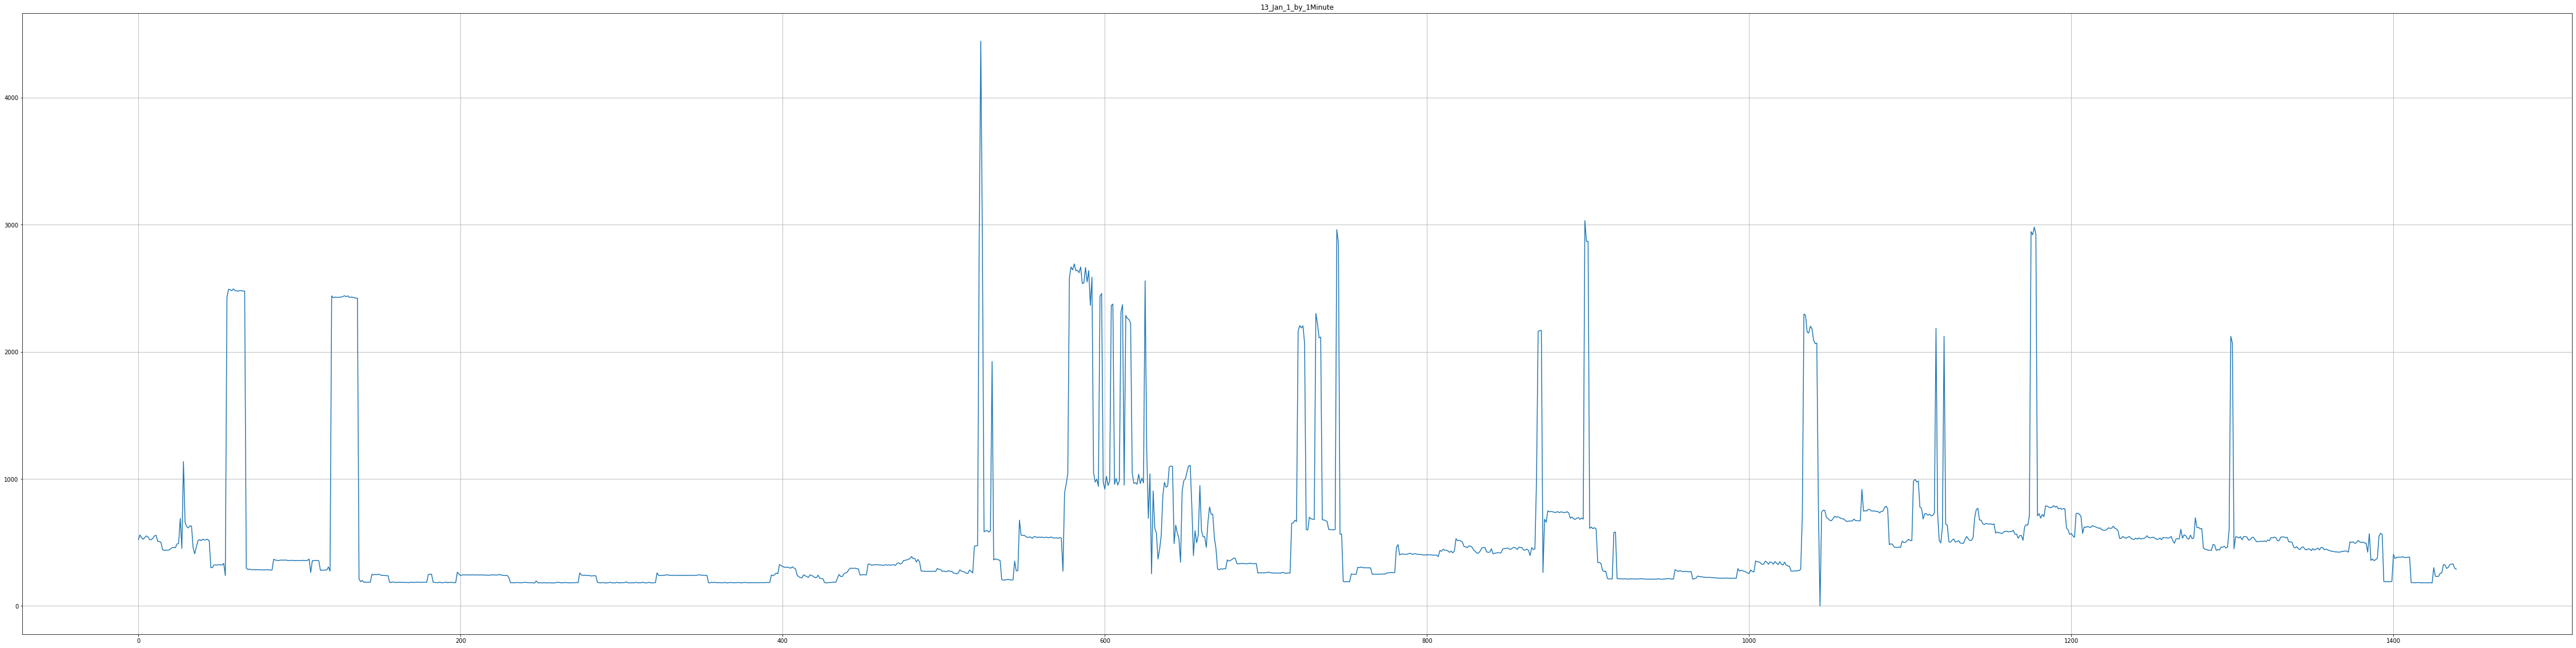

In [46]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_1Minute")
plt.plot(range(24*60), total_watt_list)
plt.savefig('./13_Jan_1_by_01Minute.png')
plt.show()

In [47]:
mid_list=[]
for i in range(0, len(total_watt_list), 5):
    small_list=[]
    for j in range(i,i+5):
        small_list.append(total_watt_list[j])
        print(small_list)
    mid_list.append(max(small_list))
print("\n",mid_list)

[522]
[522, 558]
[522, 558, 537]
[522, 558, 537, 525]
[522, 558, 537, 525, 539]
[551]
[551, 542]
[551, 542, 522]
[551, 542, 522, 521]
[551, 542, 522, 521, 533]
[551]
[551, 556]
[551, 556, 509]
[551, 556, 509, 507]
[551, 556, 509, 507, 501]
[444]
[444, 436]
[444, 436, 439]
[444, 436, 439, 439]
[444, 436, 439, 439, 440]
[449]
[449, 459]
[449, 459, 461]
[449, 459, 461, 458]
[449, 459, 461, 458, 487]
[492]
[492, 688]
[492, 688, 453]
[492, 688, 453, 1136]
[492, 688, 453, 1136, 657]
[624]
[624, 614]
[624, 614, 630]
[624, 614, 630, 628]
[624, 614, 630, 628, 457]
[410]
[410, 464]
[410, 464, 514]
[410, 464, 514, 522]
[410, 464, 514, 522, 514]
[525]
[525, 519]
[525, 519, 521]
[525, 519, 521, 525]
[525, 519, 521, 525, 511]
[302]
[302, 301]
[302, 301, 323]
[302, 301, 323, 323]
[302, 301, 323, 323, 322]
[325]
[325, 323]
[325, 323, 322]
[325, 323, 322, 335]
[325, 323, 322, 335, 238]
[2429]
[2429, 2492]
[2429, 2492, 2488]
[2429, 2492, 2488, 2480]
[2429, 2492, 2488, 2480, 2495]
[2481]
[2481, 2479]
[24

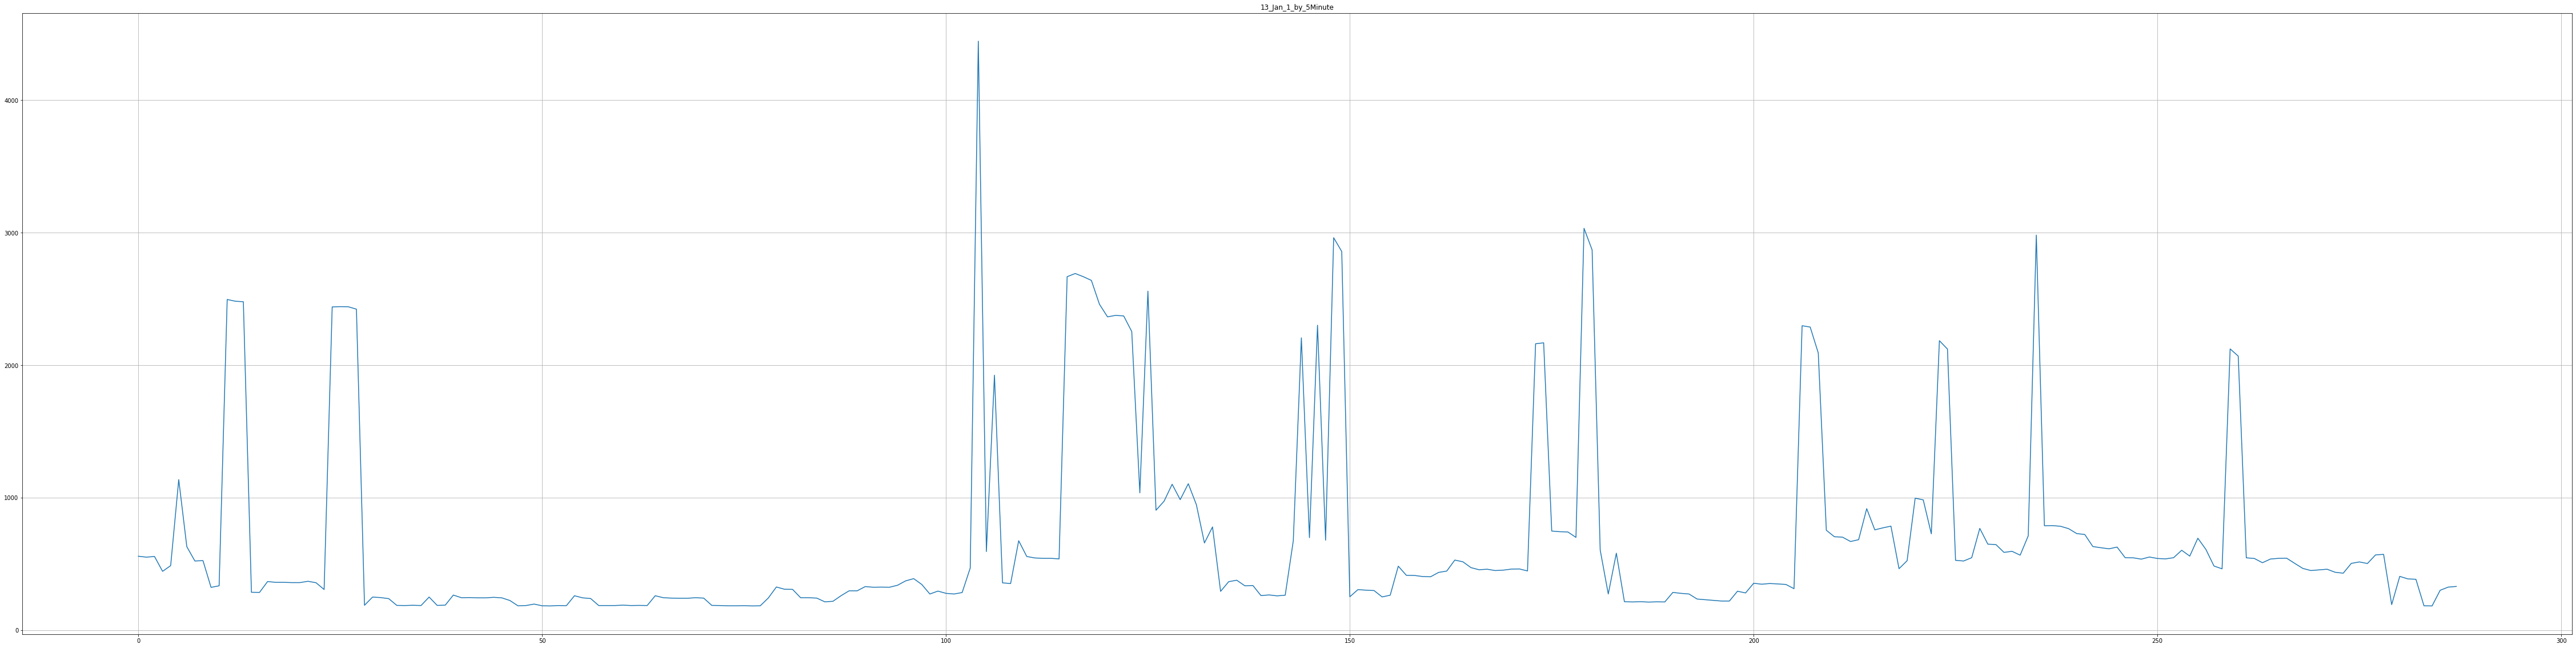

In [51]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_5Minute")
plt.plot(range(24*12), mid_list)
plt.savefig('./13_Jan_1_by_05Minute.png')
plt.show()

In [49]:
big_list=[]
for i in range(0, len(total_watt_list), 10):
    small_list=[]
    for j in range(i,i+10):
        small_list.append(total_watt_list[j])
        print(small_list)
    big_list.append(max(small_list))
print("\n",big_list)

[522]
[522, 558]
[522, 558, 537]
[522, 558, 537, 525]
[522, 558, 537, 525, 539]
[522, 558, 537, 525, 539, 551]
[522, 558, 537, 525, 539, 551, 542]
[522, 558, 537, 525, 539, 551, 542, 522]
[522, 558, 537, 525, 539, 551, 542, 522, 521]
[522, 558, 537, 525, 539, 551, 542, 522, 521, 533]
[551]
[551, 556]
[551, 556, 509]
[551, 556, 509, 507]
[551, 556, 509, 507, 501]
[551, 556, 509, 507, 501, 444]
[551, 556, 509, 507, 501, 444, 436]
[551, 556, 509, 507, 501, 444, 436, 439]
[551, 556, 509, 507, 501, 444, 436, 439, 439]
[551, 556, 509, 507, 501, 444, 436, 439, 439, 440]
[449]
[449, 459]
[449, 459, 461]
[449, 459, 461, 458]
[449, 459, 461, 458, 487]
[449, 459, 461, 458, 487, 492]
[449, 459, 461, 458, 487, 492, 688]
[449, 459, 461, 458, 487, 492, 688, 453]
[449, 459, 461, 458, 487, 492, 688, 453, 1136]
[449, 459, 461, 458, 487, 492, 688, 453, 1136, 657]
[624]
[624, 614]
[624, 614, 630]
[624, 614, 630, 628]
[624, 614, 630, 628, 457]
[624, 614, 630, 628, 457, 410]
[624, 614, 630, 628, 457, 410, 4

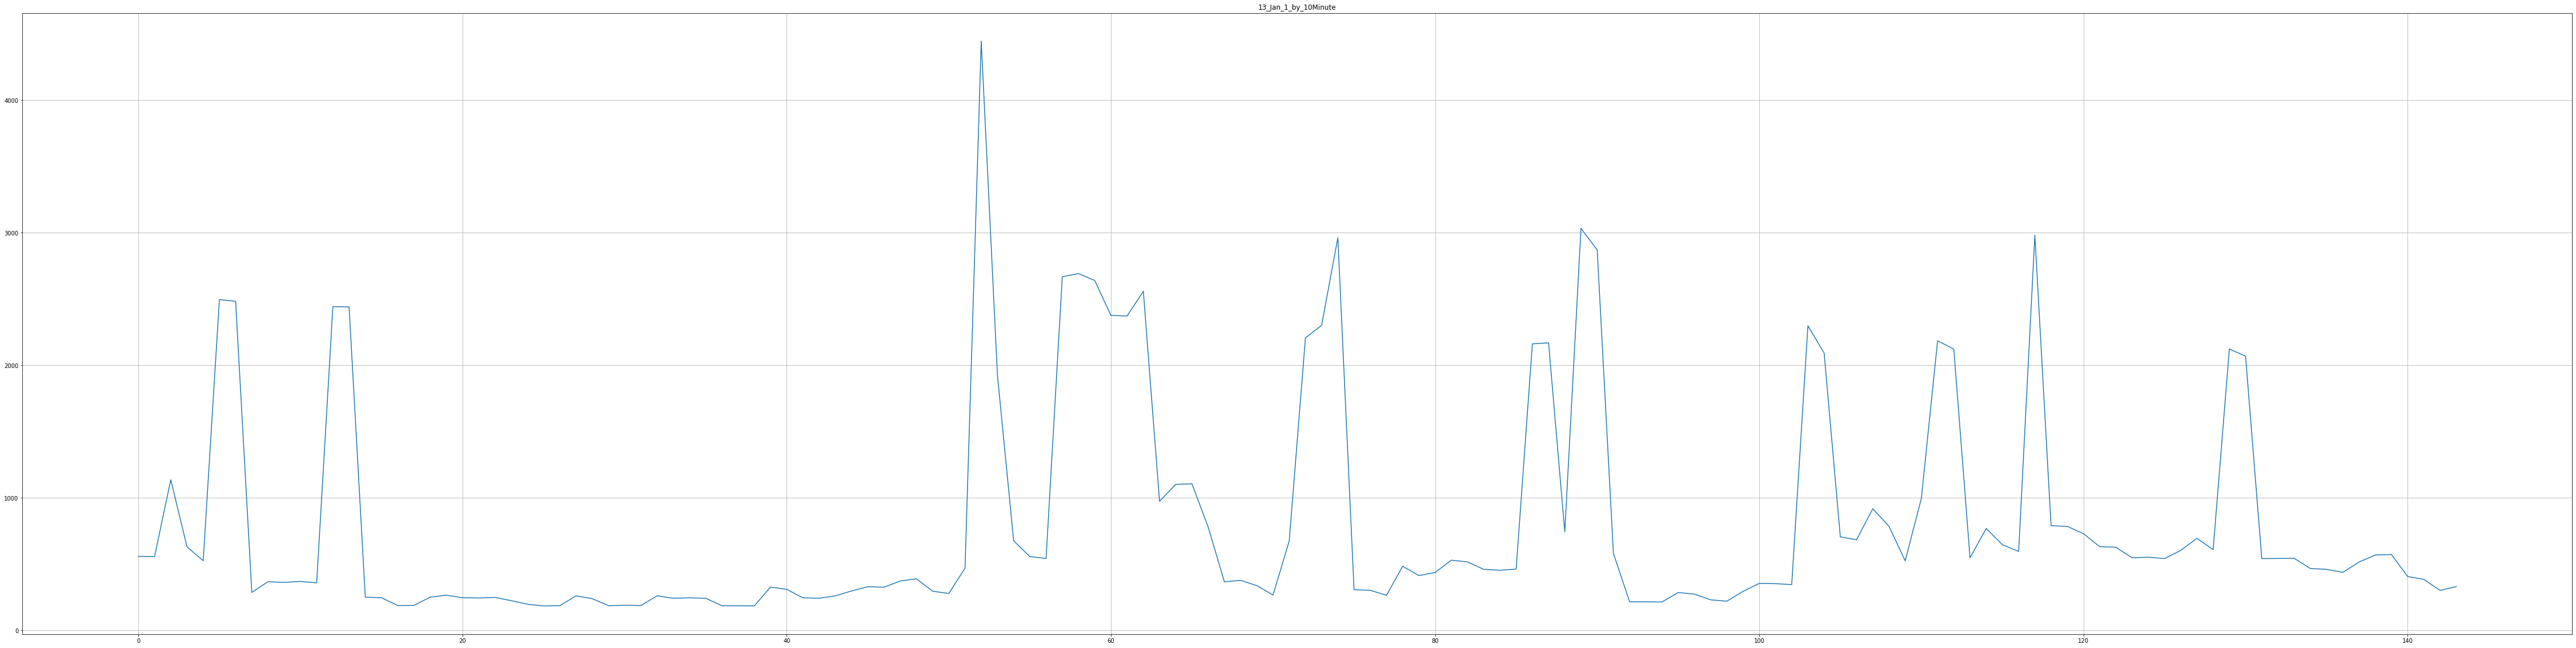

In [50]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_10Minute")
plt.plot(range(24*6), big_list)
plt.savefig('./13_Jan_1_by_10Minute.png')
plt.show()

In [142]:
electric_Jan = pd.read_csv("./Electirc_Data_CSV_FInal/2013/2013_1_House1_Ch1_Electric_Data_Final.csv", encoding='cp949')
Jan_data=electric_Jan[:24]["Watt"]

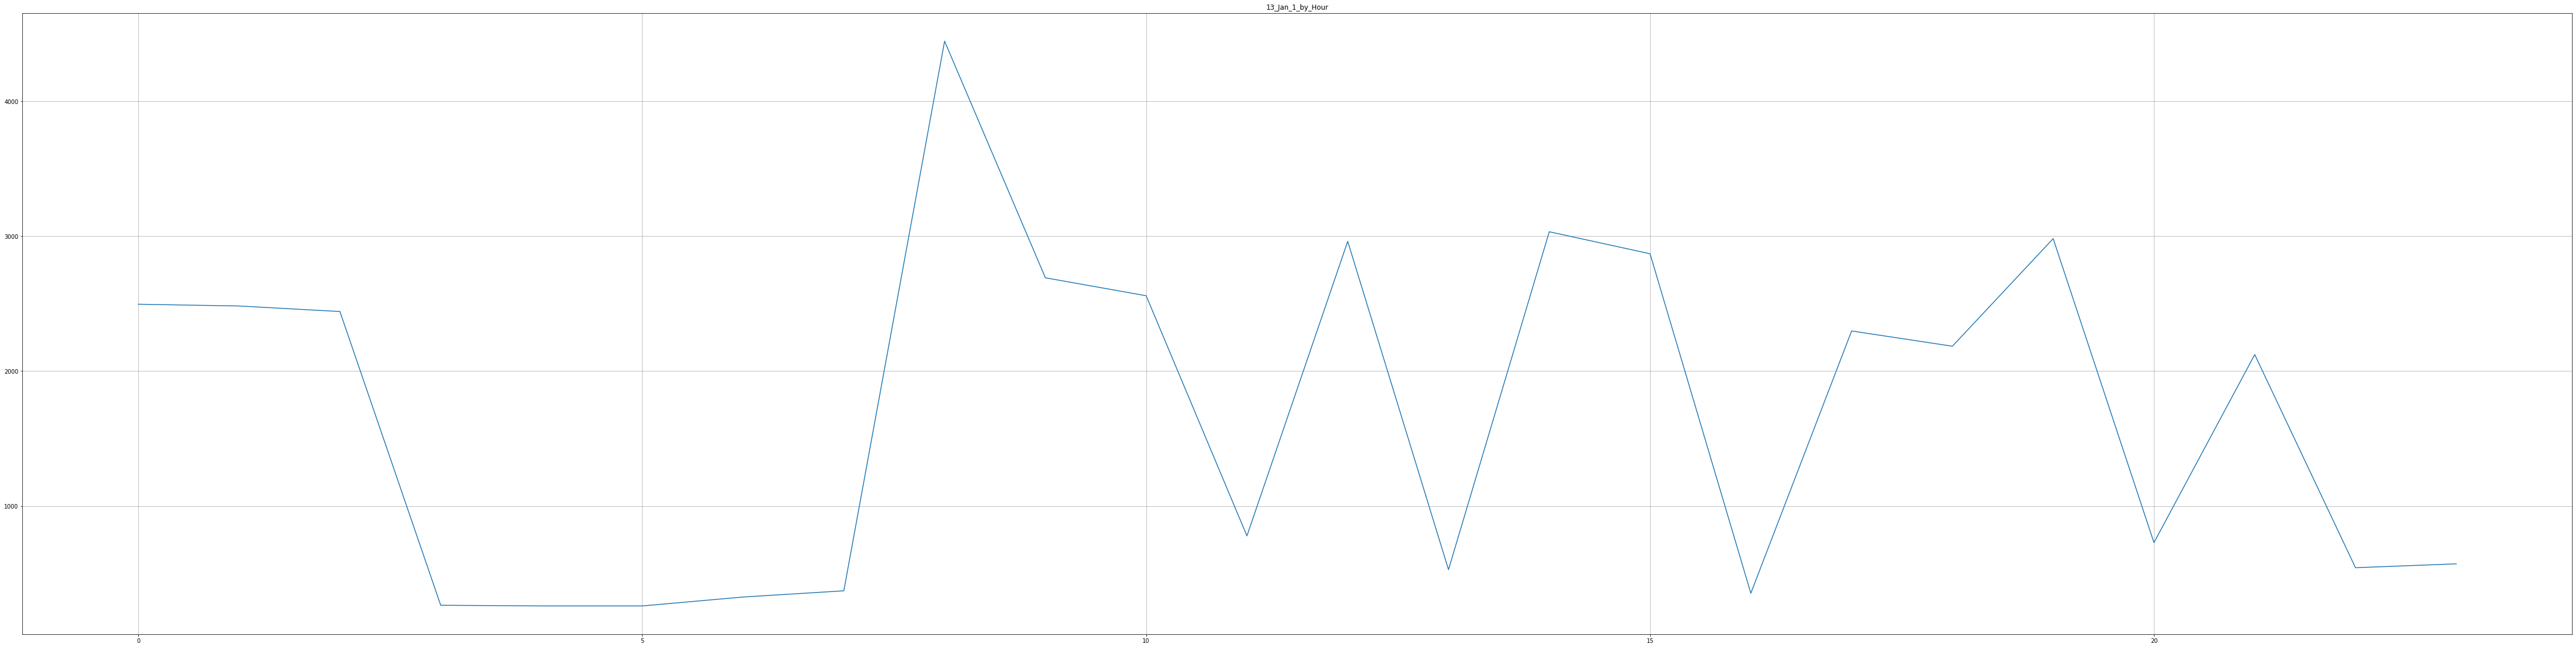

In [143]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_Hour")
plt.plot(range(24), Jan_data)
plt.savefig('./13_Jan_1_by_Hour.png')
plt.show()